# Wranglers

In this notebook we give a brief overview of wrangling with netCDF-SCM.

In [1]:
# NBVAL_IGNORE_OUTPUT
import glob
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymagicc

In [2]:
plt.style.use("bmh")
%matplotlib inline

## Wrangling help

The wrangling help can be accessed via our command line interface.

In [3]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm wrangle -h

Usage: netcdf-scm wrangle [OPTIONS] SRC DST WRANGLE_CONTACT

  Wrangle netCDF-SCM ``.nc`` files into other formats and directory
  structures.

  ``src`` is searched recursively and netcdf-scm will attempt to wrangle all
  the files found.

  ``wrangle_contact`` is written into the header of the output files.

Options:
  --regexp TEXT                   Regular expression to apply to file
                                  directory (only wrangles matches). Be
                                  careful, if you use a very copmlex regexp
                                  directory sorting can be extremely slow (see
                                  e.g. discussion at
                                  https://stackoverflow.com/a/5428712)!
                                  [default: ^(?!.*(fx)).*$]

  --prefix TEXT                   Prefix to apply to output file names (not
                                  paths).

  --out-format [mag-files|mag-files-average-year-start-year|mag-files-average

## MAG file wrangling

The most common format to wrangle to is the `.MAG` format. This is a custom MAGICC format (see https://pymagicc.readthedocs.io/en/latest/file_conventions.html#the-future). We can wrangle data which has already been crunched to this format as shown below.

In [4]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm wrangle \
    "../../../tests/test-data/expected-crunching-output/cmip6output/Lmon/CMIP6/CMIP/NCAR" \
    "../../../output-examples/wrangled-files" "notebook example <email address>" \
    --force \
    --drs "CMIP6Output" \
    --out-format "mag-files" \
    --regexp ".*cSoilFast.*"

87973 2021-03-18 13:05:52,227 INFO:netcdf_scm:netcdf-scm: 2.0.2+15.g74db9d85.dirty
87973 2021-03-18 13:05:52,228 INFO:netcdf_scm:wrangle_contact: notebook example <email address>
87973 2021-03-18 13:05:52,228 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/netCDF-SCM/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/Lmon/CMIP6/CMIP/NCAR
87973 2021-03-18 13:05:52,228 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/netCDF-SCM/netcdf-scm/output-examples/wrangled-files
87973 2021-03-18 13:05:52,228 INFO:netcdf_scm:regexp: .*cSoilFast.*
87973 2021-03-18 13:05:52,228 INFO:netcdf_scm:prefix: None
87973 2021-03-18 13:05:52,228 INFO:netcdf_scm:drs: CMIP6Output
87973 2021-03-18 13:05:52,228 INFO:netcdf_scm:out_format: mag-files
87973 2021-03-18 13:05:52,228 INFO:netcdf_scm:force: True
87973 2021-03-18 13:05:52,230 INFO:netcdf_scm:Finding directories with files
Walking through directories and applying `check_func`: 11it [00:00, 9394.69it/s]
87973 2021-03-18 1

We can then load the `.MAG` files using Pymagicc.

In [5]:
written_files = [
    f for f in Path("../../../output-examples/wrangled-files").rglob("*.MAG")
]
written_files

[PosixPath('../../../output-examples/wrangled-files/CMIP6/CMIP/NCAR/CESM2/historical/r7i1p1f1/Lmon/cSoilFast/gn/v20190311/netcdf-scm_cSoilFast_Lmon_CESM2_historical_r7i1p1f1_gn_195701-195703.MAG')]

In [6]:
wrangled = pymagicc.io.MAGICCData(str(written_files[0]))

In [7]:
# NBVAL_IGNORE_OUTPUT
wrangled.timeseries()

time                                                                                         1957-01-15 12:00:00  \
climate_model model       region                         scenario    todo unit    variable                         
unspecified   unspecified World                          unspecified SET  kg m^-2 cSoilFast             0.085600   
                          World|Northern Hemisphere      unspecified SET  kg m^-2 cSoilFast             0.097727   
                          World|Southern Hemisphere      unspecified SET  kg m^-2 cSoilFast             0.060421   
                          World|Land                     unspecified SET  kg m^-2 cSoilFast             0.085600   
                          World|Northern Hemisphere|Land unspecified SET  kg m^-2 cSoilFast             0.097727   
                          World|Southern Hemisphere|Land unspecified SET  kg m^-2 cSoilFast             0.060421   

time                                                                                         1957-02-14 00:00:00  \
climate_model model       region                         scenario    todo unit    variable                         
unspecified   unspecified World                          unspecified SET  kg m^-2 cSoilFast             0.085547   
                          World|Northern Hemisphere      unspecified SET  kg m^-2 cSoilFast             0.097910   
                          World|Southern Hemisphere      unspecified SET  kg m^-2 cSoilFast             0.059879   
                          World|Land                     unspecified SET  kg m^-2 cSoilFast             0.085547   
                          World|Northern Hemisphere|Land unspecified SET  kg m^-2 cSoilFast             0.097910   
                          World|Southern Hemisphere|Land unspecified SET  kg m^-2 cSoilFast             0.059879   

time                                                                                         1957-03-15 12:00:00  
climate_model model       region                         scenario    todo unit    variable                        
unspecified   unspecified World                          unspecified SET  kg m^-2 cSoilFast             0.085422  
                          World|Northern Hemisphere      unspecified SET  kg m^-2 cSoilFast             0.098135  
                          World|Southern Hemisphere      unspecified SET  kg m^-2 cSoilFast             0.059024  
                          World|Land                     unspecified SET  kg m^-2 cSoilFast             0.085422  
                          World|Northern Hemisphere|Land unspecified SET  kg m^-2 cSoilFast             0.098135  
                          World|Southern Hemisphere|Land unspecified SET  kg m^-2 cSoilFast             0.059024

<AxesSubplot:xlabel='time', ylabel='kg m^-2'>

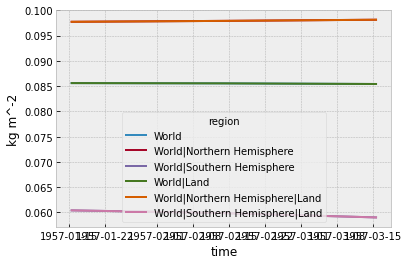

In [8]:
# NBVAL_IGNORE_OUTPUT
wrangled.lineplot(hue="region")

### Adjusting units

The units of the wrangled data are `kgmsuper-2`. This might not be super helpful. As such, `netcdf-scm wrangle` allows users to specify a csv which defines the target units to use for variables when wrangling.

The conversion csv should look like the below.

In [9]:
conv_csv = pd.DataFrame(
    [["cSoilFast", "t / m**2"], ["tos", "K"]], columns=["variable", "unit"]
)
conv_csv_path = "../../../output-examples/conversion-new-units.csv"
conv_csv.to_csv(conv_csv_path, index=False)
with open(conv_csv_path) as f:
    conv_csv_content = f.read()

print(conv_csv_content)

variable,unit
cSoilFast,t / m**2
tos,K



With such a csv, we can now crunch to our desired units.

In [10]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm wrangle \
    "../../../tests/test-data/expected-crunching-output/cmip6output/Lmon/CMIP6/CMIP/NCAR" \
    "../../../output-examples/wrangled-files-new-units" \
    "notebook example <email address>" \
    --force --drs "CMIP6Output" \
    --out-format "mag-files" \
    --regexp ".*cSoilFast.*" \
    --target-units-specs "../../../output-examples/conversion-new-units.csv"

87988 2021-03-18 13:06:01,020 INFO:netcdf_scm:netcdf-scm: 2.0.2+15.g74db9d85.dirty
87988 2021-03-18 13:06:01,020 INFO:netcdf_scm:wrangle_contact: notebook example <email address>
87988 2021-03-18 13:06:01,020 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/netCDF-SCM/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/Lmon/CMIP6/CMIP/NCAR
87988 2021-03-18 13:06:01,020 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/netCDF-SCM/netcdf-scm/output-examples/wrangled-files-new-units
87988 2021-03-18 13:06:01,020 INFO:netcdf_scm:regexp: .*cSoilFast.*
87988 2021-03-18 13:06:01,021 INFO:netcdf_scm:prefix: None
87988 2021-03-18 13:06:01,021 INFO:netcdf_scm:drs: CMIP6Output
87988 2021-03-18 13:06:01,021 INFO:netcdf_scm:out_format: mag-files
87988 2021-03-18 13:06:01,021 INFO:netcdf_scm:force: True
87988 2021-03-18 13:06:01,022 INFO:netcdf_scm:Finding directories with files
Walking through directories and applying `check_func`: 11it [00:00, 9150.60it/s]
87988 20

In [11]:
# NBVAL_IGNORE_OUTPUT
written_files = [
    f
    for f in Path("../../../output-examples/wrangled-files-new-units").rglob(
        "*.MAG"
    )
]
wrangled_new_units = pymagicc.io.MAGICCData(str(written_files[0]))
wrangled_new_units.timeseries()

time                                                                                         1957-01-15 12:00:00  \
climate_model model       region                         scenario    todo unit    variable                         
unspecified   unspecified World                          unspecified SET  t / m^2 cSoilFast             0.000086   
                          World|Northern Hemisphere      unspecified SET  t / m^2 cSoilFast             0.000098   
                          World|Southern Hemisphere      unspecified SET  t / m^2 cSoilFast             0.000060   
                          World|Land                     unspecified SET  t / m^2 cSoilFast             0.000086   
                          World|Northern Hemisphere|Land unspecified SET  t / m^2 cSoilFast             0.000098   
                          World|Southern Hemisphere|Land unspecified SET  t / m^2 cSoilFast             0.000060   

time                                                                                         1957-02-14 00:00:00  \
climate_model model       region                         scenario    todo unit    variable                         
unspecified   unspecified World                          unspecified SET  t / m^2 cSoilFast             0.000086   
                          World|Northern Hemisphere      unspecified SET  t / m^2 cSoilFast             0.000098   
                          World|Southern Hemisphere      unspecified SET  t / m^2 cSoilFast             0.000060   
                          World|Land                     unspecified SET  t / m^2 cSoilFast             0.000086   
                          World|Northern Hemisphere|Land unspecified SET  t / m^2 cSoilFast             0.000098   
                          World|Southern Hemisphere|Land unspecified SET  t / m^2 cSoilFast             0.000060   

time                                                                                         1957-03-15 12:00:00  
climate_model model       region                         scenario    todo unit    variable                        
unspecified   unspecified World                          unspecified SET  t / m^2 cSoilFast             0.000085  
                          World|Northern Hemisphere      unspecified SET  t / m^2 cSoilFast             0.000098  
                          World|Southern Hemisphere      unspecified SET  t / m^2 cSoilFast             0.000059  
                          World|Land                     unspecified SET  t / m^2 cSoilFast             0.000085  
                          World|Northern Hemisphere|Land unspecified SET  t / m^2 cSoilFast             0.000098  
                          World|Southern Hemisphere|Land unspecified SET  t / m^2 cSoilFast             0.000059

<AxesSubplot:xlabel='time', ylabel='t / m^2'>

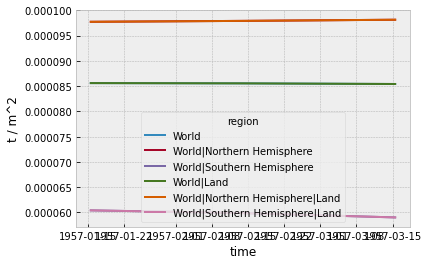

In [12]:
# NBVAL_IGNORE_OUTPUT
wrangled_new_units.lineplot(hue="region")

#### Taking area sum

We can also set the units to include an area sum. For example, if we set our units to `Gt / yr` rather than `Gt / m**2 / yr` then the wrangler will automatically take an area sum of the data (weighted by the effective area used in the crunching) before returning the data.

In [13]:
conv_csv = pd.DataFrame(
    [["cSoilFast", "Gt"], ["tos", "K"]], columns=["variable", "unit"]
)
conv_csv_path = "../../../output-examples/conversion-area-sum-units.csv"
conv_csv.to_csv(conv_csv_path, index=False)
with open(conv_csv_path) as f:
    conv_csv_content = f.read()

print(conv_csv_content)

variable,unit
cSoilFast,Gt
tos,K



In [14]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm wrangle \
    "../../../tests/test-data/expected-crunching-output/cmip6output/Lmon/CMIP6/CMIP/NCAR" \
    "../../../output-examples/wrangled-files-area-sum-units" \
    "notebook example <email address>" \
    --force \
    --drs "CMIP6Output" \
    --out-format "mag-files" \
    --regexp ".*cSoilFast.*" \
    --target-units-specs "../../../output-examples/conversion-area-sum-units.csv"

88003 2021-03-18 13:06:10,165 INFO:netcdf_scm:netcdf-scm: 2.0.2+15.g74db9d85.dirty
88003 2021-03-18 13:06:10,166 INFO:netcdf_scm:wrangle_contact: notebook example <email address>
88003 2021-03-18 13:06:10,166 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/netCDF-SCM/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/Lmon/CMIP6/CMIP/NCAR
88003 2021-03-18 13:06:10,166 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/netCDF-SCM/netcdf-scm/output-examples/wrangled-files-area-sum-units
88003 2021-03-18 13:06:10,166 INFO:netcdf_scm:regexp: .*cSoilFast.*
88003 2021-03-18 13:06:10,166 INFO:netcdf_scm:prefix: None
88003 2021-03-18 13:06:10,166 INFO:netcdf_scm:drs: CMIP6Output
88003 2021-03-18 13:06:10,166 INFO:netcdf_scm:out_format: mag-files
88003 2021-03-18 13:06:10,166 INFO:netcdf_scm:force: True
88003 2021-03-18 13:06:10,168 INFO:netcdf_scm:Finding directories with files
Walking through directories and applying `check_func`: 11it [00:00, 9617.96it/s]
880

In [15]:
# NBVAL_IGNORE_OUTPUT
written_files = [
    f
    for f in Path(
        "../../../output-examples/wrangled-files-area-sum-units"
    ).rglob("*.MAG")
]
wrangled_area_sum_units = pymagicc.io.MAGICCData(str(written_files[0]))
wrangled_area_sum_units.timeseries()

time                                                                                      1957-01-15 12:00:00  \
climate_model model       region                         scenario    todo unit variable                         
unspecified   unspecified World                          unspecified SET  Gt   cSoilFast             12.79290   
                          World|Land                     unspecified SET  Gt   cSoilFast             12.79290   
                          World|Northern Hemisphere      unspecified SET  Gt   cSoilFast              9.85760   
                          World|Northern Hemisphere|Land unspecified SET  Gt   cSoilFast              9.85760   
                          World|Southern Hemisphere      unspecified SET  Gt   cSoilFast              2.93526   
                          World|Southern Hemisphere|Land unspecified SET  Gt   cSoilFast              2.93526   

time                                                                                      1957-02-14 00:00:00  \
climate_model model       region                         scenario    todo unit variable                         
unspecified   unspecified World                          unspecified SET  Gt   cSoilFast              12.7849   
                          World|Land                     unspecified SET  Gt   cSoilFast              12.7849   
                          World|Northern Hemisphere      unspecified SET  Gt   cSoilFast               9.8760   
                          World|Northern Hemisphere|Land unspecified SET  Gt   cSoilFast               9.8760   
                          World|Southern Hemisphere      unspecified SET  Gt   cSoilFast               2.9089   
                          World|Southern Hemisphere|Land unspecified SET  Gt   cSoilFast               2.9089   

time                                                                                      1957-03-15 12:00:00  
climate_model model       region                         scenario    todo unit variable                        
unspecified   unspecified World                          unspecified SET  Gt   cSoilFast             12.76610  
                          World|Land                     unspecified SET  Gt   cSoilFast             12.76610  
                          World|Northern Hemisphere      unspecified SET  Gt   cSoilFast              9.89873  
                          World|Northern Hemisphere|Land unspecified SET  Gt   cSoilFast              9.89873  
                          World|Southern Hemisphere      unspecified SET  Gt   cSoilFast              2.86740  
                          World|Southern Hemisphere|Land unspecified SET  Gt   cSoilFast              2.86740

<AxesSubplot:xlabel='time', ylabel='Gt'>

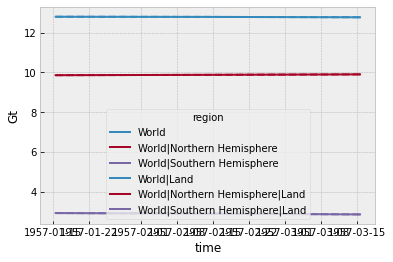

In [16]:
# NBVAL_IGNORE_OUTPUT
solid_regions = [
    "World",
    "World|Northern Hemisphere",
    "World|Southern Hemisphere",
]
ax = wrangled_area_sum_units.filter(region=solid_regions).lineplot(
    hue="region", linestyle="-"
)
wrangled_area_sum_units.filter(region=solid_regions, keep=False).lineplot(
    hue="region", linestyle="--", dashes=(5, 7.5), ax=ax
)

As one last sanity check, we can make sure that the world total equals the regional total to within rounding errors.

In [17]:
np.testing.assert_allclose(
    wrangled_area_sum_units.filter(region="World")
    .timeseries()
    .values.squeeze(),
    wrangled_area_sum_units.filter(
        region=["World|Northern Hemisphere", "World|Southern Hemisphere"]
    )
    .timeseries()
    .sum()
    .values.squeeze(),
    rtol=1e-5,
)

### Time operations

The wrangling can also include a few basic time operations e.g. annual means or interpolation onto different grids. The different `out-format` codes follow those in [Pymagicc](https://github.com/openclimatedata/pymagicc/pull/272) (link to be updated once PR is merged). Here we show one example where we take the annual mean as part of the wrangling process.

In [18]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm wrangle \
    "../../../tests/test-data/expected-crunching-output/cmip6output/Amon/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl" \
    "../../../output-examples/wrangled-files-average-year" \
    "notebook example <email address>" \
    --force \
    --drs "CMIP6Output" \
    --out-format "mag-files-average-year-mid-year"

88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:netcdf-scm: 2.0.2+15.g74db9d85.dirty
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:wrangle_contact: notebook example <email address>
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/netCDF-SCM/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/Amon/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/netCDF-SCM/netcdf-scm/output-examples/wrangled-files-average-year
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:regexp: ^(?!.*(fx)).*$
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:prefix: None
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:drs: CMIP6Output
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:out_format: mag-files-average-year-mid-year
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:force: True
88024 2021-03-18 13:06:19,120 INFO:netcdf_scm:Finding directories with files
Walking through directories and applying

In [19]:
# NBVAL_IGNORE_OUTPUT
written_files = [
    f
    for f in Path(
        "../../../output-examples/wrangled-files-average-year"
    ).rglob("*.MAG")
]
wrangled_annual_mean = pymagicc.io.MAGICCData(str(written_files[0]))
wrangled_annual_mean.timeseries()

time                                                                                      2840-07-01 00:00:00  \
climate_model model       region                          scenario    todo unit variable                        
unspecified   unspecified World                           unspecified SET  K    tas                   285.883   
                          World|Northern Hemisphere       unspecified SET  K    tas                   286.566   
                          World|Southern Hemisphere       unspecified SET  K    tas                   285.184   
                          World|Land                      unspecified SET  K    tas                   279.502   
                          World|Ocean                     unspecified SET  K    tas                   288.453   
                          World|Northern Hemisphere|Land  unspecified SET  K    tas                   281.049   
                          World|Southern Hemisphere|Land  unspecified SET  K    tas                   276.230   
                          World|Northern Hemisphere|Ocean unspecified SET  K    tas                   290.029   
                          World|Southern Hemisphere|Ocean unspecified SET  K    tas                   287.236   
                          World|North Atlantic Ocean      unspecified SET  K    tas                   291.030   
                          World|El Nino N3.4              unspecified SET  K    tas                   297.656   

time                                                                                      2841-07-01 00:00:00  \
climate_model model       region                          scenario    todo unit variable                        
unspecified   unspecified World                           unspecified SET  K    tas                   285.841   
                          World|Northern Hemisphere       unspecified SET  K    tas                   286.482   
                          World|Southern Hemisphere       unspecified SET  K    tas                   285.185   
                          World|Land                      unspecified SET  K    tas                   279.494   
                          World|Ocean                     unspecified SET  K    tas                   288.397   
                          World|Northern Hemisphere|Land  unspecified SET  K    tas                   281.014   
                          World|Southern Hemisphere|Land  unspecified SET  K    tas                   276.279   
                          World|Northern Hemisphere|Ocean unspecified SET  K    tas                   289.914   
                          World|Southern Hemisphere|Ocean unspecified SET  K    tas                   287.225   
                          World|North Atlantic Ocean      unspecified SET  K    tas                   291.114   
                          World|El Nino N3.4              unspecified SET  K    tas                   296.947   

time                                                                                      2842-07-01 00:00:00  \
climate_model model       region                          scenario    todo unit variable                        
unspecified   unspecified World                           unspecified SET  K    tas                   285.847   
                          World|Northern Hemisphere       unspecified SET  K    tas                   286.411   
                          World|Southern Hemisphere       unspecified SET  K    tas                   285.270   
                          World|Land                      unspecified SET  K    tas                   279.590   
                          World|Ocean                     unspecified SET  K    tas                   288.366   
                          World|Northern Hemisphere|Land  unspecified SET  K    tas                   281.052   
                          World|Southern Hemisphere|Land  unspecified SET  K    tas                   276.497   
                          World|Northern He

<AxesSubplot:xlabel='time', ylabel='K'>

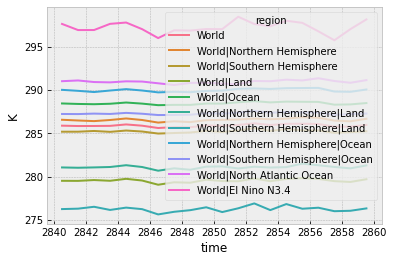

In [20]:
# NBVAL_IGNORE_OUTPUT
wrangled_annual_mean.lineplot(hue="region")

<AxesSubplot:xlabel='time', ylabel='K'>

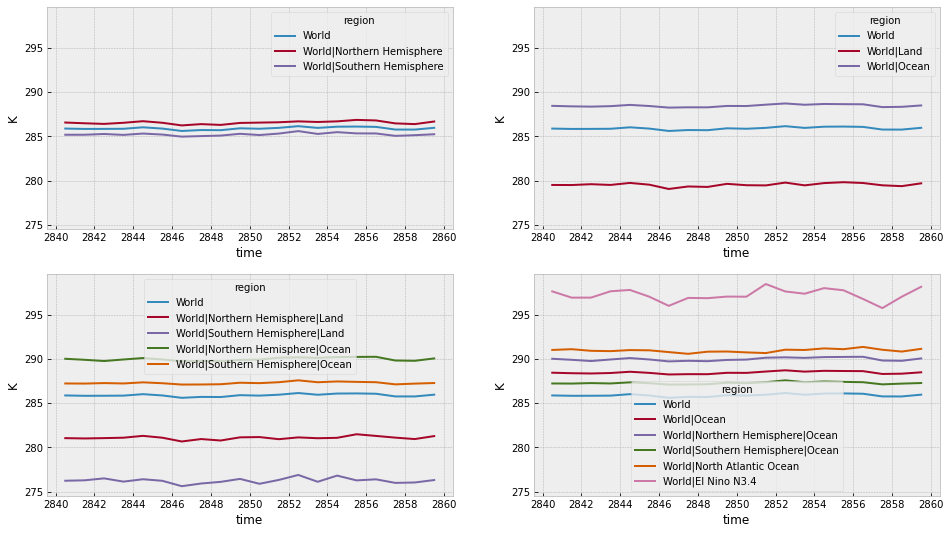

In [21]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(221)
wrangled_annual_mean.filter(region=["World", "World|*Hemisphere"]).lineplot(
    hue="region", ax=ax
)

ax = fig.add_subplot(222, sharey=ax, sharex=ax)
wrangled_annual_mean.filter(
    region=["World", "World|Land", "World|Ocean"]
).lineplot(hue="region", ax=ax)

ax = fig.add_subplot(223, sharey=ax, sharex=ax)
wrangled_annual_mean.filter(region=["World", "World|*Hemis*|*"]).lineplot(
    hue="region", ax=ax
)

ax = fig.add_subplot(224, sharey=ax, sharex=ax)
wrangled_annual_mean.filter(
    region=["World", "World|*El*", "World|*Ocean*"]
).lineplot(hue="region", ax=ax)